## Tarea 3 - Métodos de Aprendizajes de Máquinas en Data Science

### Integrantes: Sofía Álvarez, Sebastián Dinator.

### Importación de librerías y datos

In [1]:
import pandas as pd
import numpy as np
from sympy import Matrix
import re
import string
import emoji

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Modelos
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics as mt

import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [2]:
# Se cargan los datos
train_data = pd.read_csv('train_tweets.csv') # Entrenamiento
test_data = pd.read_csv('test_tweets.csv') # Clasificar

In [3]:
# Mostrando la data
display(train_data.head(6))
print(train_data.shape)
print('# id =', len(train_data['tweet_id'].unique()))

display(test_data.head(6))
print(test_data.shape)
print('# id =', len(test_data['tweet_id'].unique()))



,tweet_id,text,Odio
0,1399516036240662528,En una amistad o soy tipo: \r\nLo peor es que ...,0
1,1320788179721560065,QUIEN FUE LA MARACA CULIA TE VOY A MATAR PERRA...,1
2,1079889645280944129,menos mal q se recibe el año con ropa blanca j...,0
3,1369254390134145033,Cuantos INFILTRADOS extranjeros hay ahi😡 https...,1
4,1533854824378290176,#ENCONTRADO #GUAYAQUIL\r\nFecha: 06/06/22\r\nS...,0
5,1233127781707333632,Ana Maraca culia #Los80,1


(2256, 3)
# id = 2256


,tweet_id,text
0,1533854540763742209,Estoy de acuerdo que corrijas a tus hijos pero...
1,1277756504519725057,@danieljadue @ArquitectsPC1 Te regalo un pico ...
2,1529500412402757632,@Nnicolas_M @carolinawagner_ @i_krmns El paro ...
3,1167425893066838016,"@vroteberde Estoy en la misma, hoy no laburo c..."
4,1399515878727749632,@beudalgoaj puta merda
5,1533854418835189760,@aitana_atenea Puto hermoso cuerpazo 🤗🥰👌🏼


(2291, 2)
# id = 2291


### Hay tantos id cómo filas, así que no es significativo usar la variable para entrenar los modelos. 

In [4]:
# Analizando la variable Odio
train_data['Odio'].unique()

array([0, 1], dtype=int64)

In [5]:
print(f'Hay {train_data.Odio.isnull().sum()} datos nulos en Odio')
print(f'Hay {train_data.text.isnull().sum()} datos nulos en text')

print(f'Hay {test_data.text.isnull().sum()} datos nulos en text')

Hay 0 datos nulos en Odio
Hay 0 datos nulos en text
Hay 0 datos nulos en text


### No hay nulos, por lo que ninguna fila se elimina.
### A continuación, se cuentan las palabras por tweet para entender mejor los datos:

En train
Hay un mínimo de 1 palabras
Hay un máximo de 86 palabras


<Axes: ylabel='Frequency'>

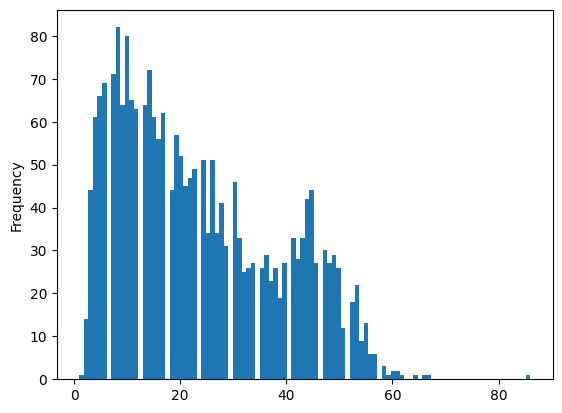

In [6]:
print('En train')
words_count = train_data.text.str.split().apply(len) # Contando palabras
print(f'Hay un mínimo de {words_count.min()} palabras')
print(f'Hay un máximo de {words_count.max()} palabras')
words_count.plot(kind="hist", bins=100)

En test
Hay un mínimo de 1 palabras
Hay un máximo de 82 palabras


<Axes: ylabel='Frequency'>

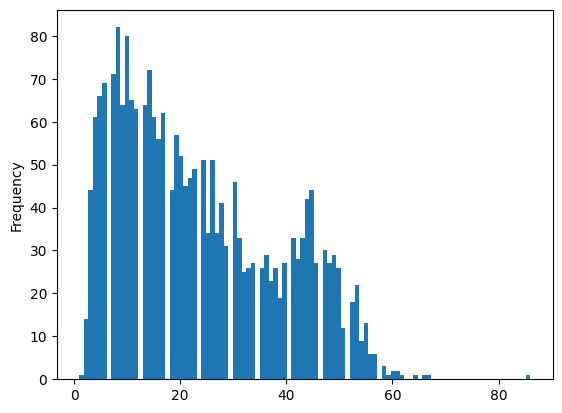

In [7]:
print('En test')
words_count_test = test_data.text.str.split().apply(len) # Contando palabras
print(f'Hay un mínimo de {words_count_test.min()} palabras')
print(f'Hay un máximo de {words_count_test.max()} palabras')
words_count.plot(kind="hist", bins=100)

### Las distribuciones son muy parecidas

### Viendo cuáles son los extremos: (solo hay 1 tweet para cada valor)

In [8]:
print('Tweet con 1 palbra:')
display(train_data.iloc[list(words_count).index(min(list(words_count)))].text)

print('Tweet con 86 palabras:')
pd.set_option('display.max_colwidth', None)
display(train_data.iloc[list(words_count).index(max(list(words_count)))].text)


Tweet con 1 palbra:


'Puta'

Tweet con 86 palabras:


'@vanev87 @OvMyriam @JaraDiana @MariteZann @luzmatto @yi_yi46 @karinaottazu @VictorRamnGonz3 @e_guata @LuisRob68054970 @marlepy @JuanFer79484046 @SheyShey76 @ledmp @gonzalez_justo @dario_ee @arquiferrari @71Elvis @CespedesBea @GessyCazal @Rocio_La_Negra @MelisseDi @RamonMPoletti @adiazarce @DardoCastelluc2 @MarParedes_08 @Eliyeg @mafaldita_90 @analaufernan @Carlosled1951 @Aleja92209724 @AngelicaZunilda @antomartinez87 @bea_dtj @Cuchicho @Akcv @Yoyi_aponte @jose369100 @piralaguna @lucho15colman @transporte2012 @neida_aquino @escuelazurda @mximo10meridio1 Hilanderos calentamiento!! Estamos a horitas de despedir un año y recibir a otro con esperanzas, sueños y anhelos renovados! Deseo para todos ustedes un bendecido año y para todos los q vivimos en este dulce pais que Marito sea menos desastre!!😂😂 https://t.co/d7B34Dt74n'

In [9]:
print('Tweet con 1 palbra en test:')
display(test_data.iloc[list(words_count_test).index(min(list(words_count_test)))].text)

print('Tweet con 82 en test palabras:')
pd.set_option('display.max_colwidth', None)
display(test_data.iloc[list(words_count_test).index(max(list(words_count_test)))].text)


Tweet con 1 palbra en test:


'cállate'

Tweet con 82 en test palabras:


'@axcellnew @walterggd @PerroNoyNo @crow64678553 @Blasfem46486961 @DaniloCheca @loyola2759 @JoseloPillasag1 @MashiRafael @ROG235 @ecum64 @ed_0308 @NIGUSA2 @mribad1 @DaaP3106 @NRCOXBSC @Ranifira @Di3goLro @Fxms1984 @fitofpm1 @ElManaba9 @dvizuetag @Ahsoka_14 @gabrarrea @vcbladimir @DidoViteri @FESTEBANGA @JoaqunCevallos4 @Credenciales535 @aquiles_baeza_u @Paulina83628909 @juanpablo101761 @Marisca02179658 @AlfredM66219086 @CesarPinosEspi5 @Matias93820987 @Cecibel54833509 @otravezporaqui0 @NatalyYunda @rebelde2149 @diegose1978 @elrosal1971 @Fueradeline @jaimerycardo @oidordelagaray @ernesto_alban @_360761843195 @florialarcon2 @deliapenamuzo Ya mismo canta …. Jajajaja ahí los quiero ver borreguitos . Cuando empiece a lanzar con ventilador …. Seguro que la loca del ático va a decir q NO lo conoce 🤣🤣🤣🤣🤣 https://t.co/ImGEbjcT9t'

### Se analiza la distribución de percentiles

In [10]:
words_count.describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95])

count    2256.000000
mean       23.355940
std        14.893758
min         1.000000
25%        11.000000
50%        20.000000
75%        35.000000
80%        39.000000
85%        43.000000
90%        46.000000
95%        50.000000
max        86.000000
Name: text, dtype: float64

In [11]:
# Se revisaron los tweet con más de 43 palabras pero no se encontró nada significativo
#pd.set_option('display.max_colwidth', None)
#display(train_data.iloc[[indice for indice, valor in enumerate(words_count) if valor == 46]].text)

### Limpieza de datos
* Eliminando emojis

In [12]:
train_data['text'] = train_data['text'].apply(lambda s: emoji.replace_emoji(s, ''))
display(train_data.head(6))

test_data['text'] = test_data['text'].apply(lambda s: emoji.replace_emoji(s, ''))
display(test_data.head(6))

,tweet_id,text,Odio
0,1399516036240662528,En una amistad o soy tipo: \r\nLo peor es que siempre es así lskdkdnff https://t.co/813bPNQZqR,0
1,1320788179721560065,QUIEN FUE LA MARACA CULIA TE VOY A MATAR PERRA DE MIERDVA,1
2,1079889645280944129,menos mal q se recibe el año con ropa blanca jajajajjajajajajja siempre d negro,0
3,1369254390134145033,Cuantos INFILTRADOS extranjeros hay ahi https://t.co/JtJixcR5kK,1
4,1533854824378290176,"#ENCONTRADO #GUAYAQUIL\r\nFecha: 06/06/22\r\nSector: Norte, Autopista, a la altura del puente que une Samborondon con Sauces\r\nSexo: Macho.\r\nRaza: Doberman Pinscher.\r\nObsv.: Negro con beige.\r\nContacto: 0967948036\r\n¡Ayúdalo volver con su familia!\r\n#AlertaMePerdí https://t.co/D3IHyKxUCU",0
5,1233127781707333632,Ana Maraca culia #Los80,1


,tweet_id,text
0,1533854540763742209,Estoy de acuerdo que corrijas a tus hijos pero no tratarlos como “Par de hijos de puta”
1,1277756504519725057,"@danieljadue @ArquitectsPC1 Te regalo un pico pa que lleguis de poto, wn hueco."
2,1529500412402757632,"@Nnicolas_M @carolinawagner_ @i_krmns El paro de camineros no tiene nada que ver con el estado de excepción del gobierno,cuando la ministra habla de evitar el desabastecimiento,se refiere a evitar que estos grupos radicales que dicen ser mapuches corten las rutas,por la cual se abastece al país."
3,1167425893066838016,"@vroteberde Estoy en la misma, hoy no laburo como buen planero-vago-mapuche-iraní."
4,1399515878727749632,@beudalgoaj puta merda
5,1533854418835189760,@aitana_atenea Puto hermoso cuerpazo


* Función para limpiar los tweets

In [13]:
def clean_tweet(tweet):
    #tweet = tweet.lower() # Convertir a minúsculas (dejar??)
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE) # Eliminar URLs
    tweet = re.sub(r'@\w+', '', tweet) # Eliminar menciones de usuario
    tweet = re.sub(r'#\w+', '', tweet) # Eliminar hashtags
    tweet = re.sub(r'\d+', '', tweet) # Eliminar números
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) # Eliminar puntuaciones
    tweet = re.sub(r'\\r\\n|\\n|\\r', ' ', tweet) # Eliminar caracteres especiales
    tweet = re.sub(r'\s+', ' ', tweet).strip() # Eliminar espacios adicionales
    tweet = re.sub(r'[¿¡]', '', tweet) # Eliminar ¿ y ¡
    
    return tweet

In [14]:
# Aplicando función de limpieza
train_data['cleaned_text'] = train_data['text'].apply(clean_tweet)
test_data['cleaned_text'] = test_data['text'].apply(clean_tweet)

display(train_data.head(6))
display(test_data.head(6))

,tweet_id,text,Odio,cleaned_text
0,1399516036240662528,En una amistad o soy tipo: \r\nLo peor es que siempre es así lskdkdnff https://t.co/813bPNQZqR,0,En una amistad o soy tipo Lo peor es que siempre es así lskdkdnff
1,1320788179721560065,QUIEN FUE LA MARACA CULIA TE VOY A MATAR PERRA DE MIERDVA,1,QUIEN FUE LA MARACA CULIA TE VOY A MATAR PERRA DE MIERDVA
2,1079889645280944129,menos mal q se recibe el año con ropa blanca jajajajjajajajajja siempre d negro,0,menos mal q se recibe el año con ropa blanca jajajajjajajajajja siempre d negro
3,1369254390134145033,Cuantos INFILTRADOS extranjeros hay ahi https://t.co/JtJixcR5kK,1,Cuantos INFILTRADOS extranjeros hay ahi
4,1533854824378290176,"#ENCONTRADO #GUAYAQUIL\r\nFecha: 06/06/22\r\nSector: Norte, Autopista, a la altura del puente que une Samborondon con Sauces\r\nSexo: Macho.\r\nRaza: Doberman Pinscher.\r\nObsv.: Negro con beige.\r\nContacto: 0967948036\r\n¡Ayúdalo volver con su familia!\r\n#AlertaMePerdí https://t.co/D3IHyKxUCU",0,Fecha Sector Norte Autopista a la altura del puente que une Samborondon con Sauces Sexo Macho Raza Doberman Pinscher Obsv Negro con beige Contacto Ayúdalo volver con su familia
5,1233127781707333632,Ana Maraca culia #Los80,1,Ana Maraca culia


,tweet_id,text,cleaned_text
0,1533854540763742209,Estoy de acuerdo que corrijas a tus hijos pero no tratarlos como “Par de hijos de puta”,Estoy de acuerdo que corrijas a tus hijos pero no tratarlos como “Par de hijos de puta”
1,1277756504519725057,"@danieljadue @ArquitectsPC1 Te regalo un pico pa que lleguis de poto, wn hueco.",Te regalo un pico pa que lleguis de poto wn hueco
2,1529500412402757632,"@Nnicolas_M @carolinawagner_ @i_krmns El paro de camineros no tiene nada que ver con el estado de excepción del gobierno,cuando la ministra habla de evitar el desabastecimiento,se refiere a evitar que estos grupos radicales que dicen ser mapuches corten las rutas,por la cual se abastece al país.",El paro de camineros no tiene nada que ver con el estado de excepción del gobiernocuando la ministra habla de evitar el desabastecimientose refiere a evitar que estos grupos radicales que dicen ser mapuches corten las rutaspor la cual se abastece al país
3,1167425893066838016,"@vroteberde Estoy en la misma, hoy no laburo como buen planero-vago-mapuche-iraní.",Estoy en la misma hoy no laburo como buen planerovagomapucheiraní
4,1399515878727749632,@beudalgoaj puta merda,puta merda
5,1533854418835189760,@aitana_atenea Puto hermoso cuerpazo,Puto hermoso cuerpazo


### Viendo la nueva cantidad de palabras por tweet

En train
Hay un mínimo de 1 palabras
Hay un máximo de 62 palabras


<Axes: ylabel='Frequency'>

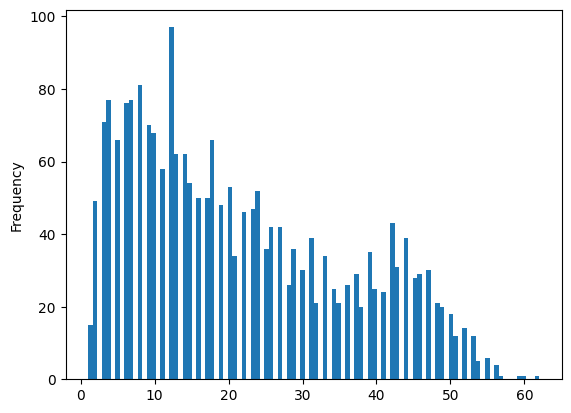

In [15]:
print('En train')
words_count = train_data.cleaned_text.str.split().apply(len) # Contando palabras
print(f'Hay un mínimo de {words_count.min()} palabras')
print(f'Hay un máximo de {words_count.max()} palabras')
words_count.plot(kind="hist", bins=100)

En test
Hay un mínimo de 0 palabras
Hay un máximo de 58 palabras


<Axes: ylabel='Frequency'>

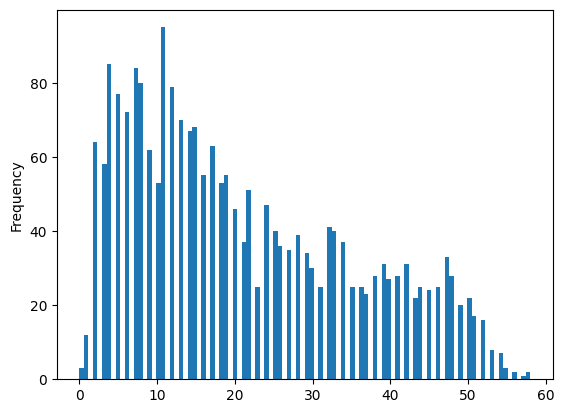

In [16]:
print('En test')
words_count = test_data.cleaned_text.str.split().apply(len) # Contando palabras
print(f'Hay un mínimo de {words_count.min()} palabras')
print(f'Hay un máximo de {words_count.max()} palabras')
words_count.plot(kind="hist", bins=100)

### Los tweets se convierten a vector para poder aplicar los modelos numéricos:
#### Nota: se probó con CountVectorizer() pero se obtiene peor score.

* Función para generar k-fold, entrenar el modelo y calcular F1-score total del modelo

In [17]:
def entrenamiento(modelo, vectorizer):
    
    tfidf_vectorizer = TfidfVectorizer()
    count_vectorizer = CountVectorizer()
    
    lista_return = [] # Lista que retornará los resultados
    
    for k in [4,5]:   # Se decide probar con dos valores de K. 
                  # K = 4 -> split 75% - 25% (564 datos)
                  # K = 5 -> split 80% - 20% (451 datos)
                
        means = []  # Lista con el promedio de los f1-score de cada k-fold
        stds = []  # Lista con la desviación estándar de los f1_score de cada k-fold
        
        f1s = []
        
        kf = KFold(n_splits = k, shuffle = False)  
        
        # Generando los k-fold
        for train_index, test_index in kf.split(train_data):
            lista_train_index  = list(train_index)  # índices de los datos para entrenar
            lista_test_index = list(test_index)  # índices de los datos para evaluar

            X_train = train_data.iloc[lista_train_index, 3] 
            y_train = train_data.iloc[lista_train_index, 2]  

            X_test = train_data.iloc[lista_test_index, 3]
            y_test = np.array(train_data.iloc[lista_test_index, 2])
            
            if vectorizer == 'T':
                # Ajusta y transforma el vectorizador TF-IDF en el conjunto de train y test
                X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
                X_test_tfidf = tfidf_vectorizer.transform(X_test)
            else: 
                X_train_tfidf = count_vectorizer.fit_transform(X_train)
                X_test_tfidf = count_vectorizer.transform(X_test)
            
            #print(f'Ahora hay {X_train_tfidf.shape[1]} variables en Train')
            #print(f'Ahora hay {X_test_tfidf.shape[1]} variables en Train')
            # Nota: La cantidad nueva de variables no es preocupante, ya que ninguno de los modelos 
            # a usar (SVM, NB, arbol de decisón) se ve afectado por la maldición de la dimensionalidad.
            
            modelo = modelo.fit(X_train_tfidf, y_train)
            predicciones = modelo.predict(X_test_tfidf)
            
            #print(modelo)
            
            f1s.append(f1_score(y_test, predicciones, average='weighted'))
            
            
        #print(f1s)
        print(f'K = {k}: {np.mean(f1s):.3f} +- {np.std(f1s):.3f}')

        lista_return.append(round(np.mean(f1s), 3))
        lista_return.append(round(np.std(f1s), 3))
    #print(lista_return)
        
    return lista_return     

* Función para graficar

In [18]:
def graficar(datos, y_min, y_max, ancho, alto, values, titulo, var_y, var_x):
    
    mean_scores_4 = [datos[i][0] for i in range(0,len(datos),1)] # Mean para K = 4
    std_scores_4 = [datos[i][1] for i in range(0,len(datos),1)]  #  Std para K = 4
    mean_scores_5 = [datos[i][2] for i in range(0,len(datos),1)] # Mean para K = 5
    std_scores_5 = [datos[i][3] for i in range(0,len(datos),1)]  #  Std para K = 5
    
    if y_min == 0:
        y_min = min(min(mean_scores_4), min(mean_scores_5)) - 0.1
        y_max = max(max(mean_scores_4), max(mean_scores_5)) + 0.1

    plt.figure(figsize=(ancho, alto))
    plt.plot(values, mean_scores_4, label = 'mean k = 4', color='red')
    plt.plot(values, [x + y for x, y in zip(mean_scores_4, std_scores_4)], label = 'std k = 4', color='black')
    plt.plot(values, [x - y for x, y in zip(mean_scores_4, std_scores_4)], color='black')
    plt.plot(values, mean_scores_5, label = 'mean k = 5', color='orange')
    plt.plot(values, [x + y for x, y in zip(mean_scores_5, std_scores_5)], label = 'std k = 5', color='blue')
    plt.plot(values, [x - y for x, y in zip(mean_scores_5, std_scores_5)], color='blue')
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.title(titulo)
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.show()
    
    
    

# SVM

### Para escoger el mejor modelo de Support Vector Machine, primero se analizarán todos los tipos de kernel para saber cuál se ajusta a los datos y 2 valores extremos de C.

#### Considerando el dilema sesgo-varianza, se espera que los modelos con C = 999 (modelo complejo) tengan mejor F1-score que los C = 1 (modelo sencillo).

#### Se usa tfidf_vectorizer porque dió valores de score más altos. 

Modelo: kernel LINEAR y C = 1
K = 4: 0.757 +- 0.008
K = 5: 0.754 +- 0.014
Modelo: kernel LINEAR y C = 999
K = 4: 0.705 +- 0.026
K = 5: 0.693 +- 0.015


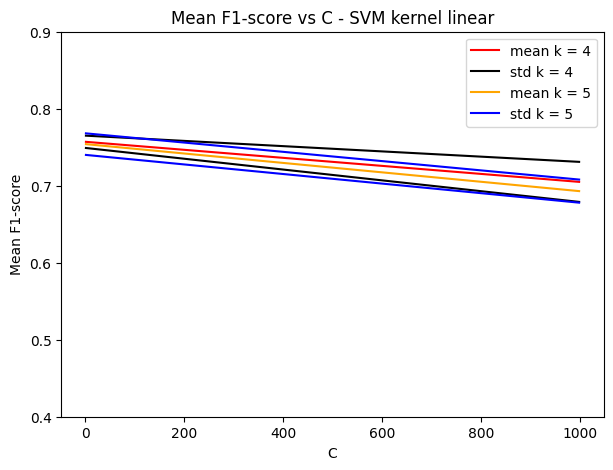

Modelo: kernel POLY y C = 1
K = 4: 0.495 +- 0.024
K = 5: 0.506 +- 0.056
Modelo: kernel POLY y C = 999
K = 4: 0.542 +- 0.034
K = 5: 0.550 +- 0.061


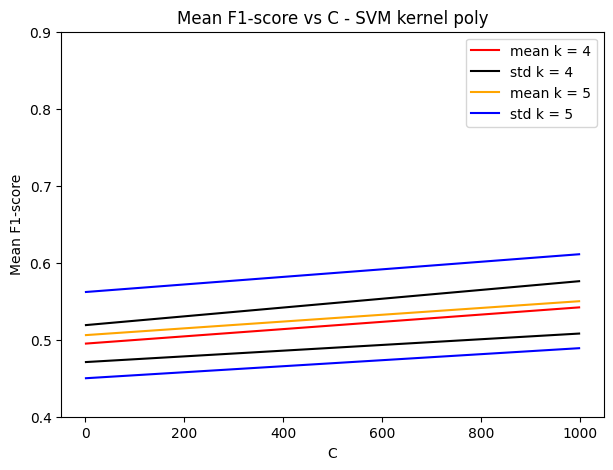

Modelo: kernel RBF y C = 1
K = 4: 0.747 +- 0.007
K = 5: 0.747 +- 0.011
Modelo: kernel RBF y C = 999
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012


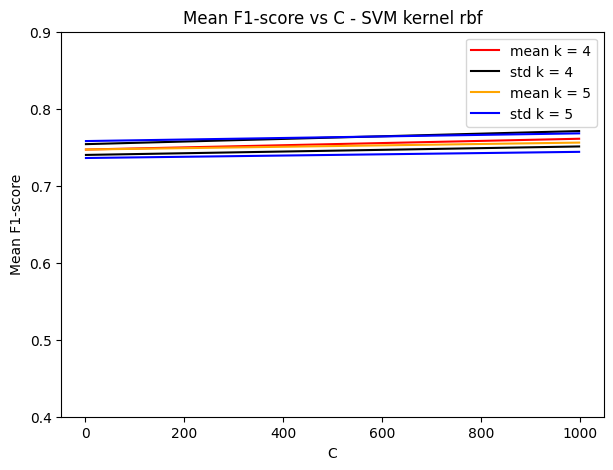

Modelo: kernel SIGMOID y C = 1
K = 4: 0.751 +- 0.008
K = 5: 0.751 +- 0.009
Modelo: kernel SIGMOID y C = 999
K = 4: 0.630 +- 0.017
K = 5: 0.637 +- 0.016


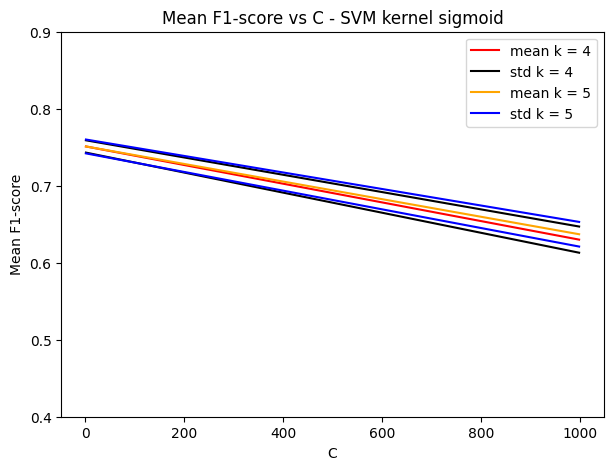

In [19]:
C_values = range(1, 1000, 998)

for tipo in ['linear', 'poly', 'rbf', 'sigmoid']:
    
    lista_resultados = [] # Lista con 2 mean y 2 std, uno para cada valor de k.
    
    for c in C_values:
        print(f"Modelo: kernel {tipo.upper()} y C = {c}")
            
        SVM = SVC(C = c, kernel = tipo, random_state = 8) # Creando modelo
        resultados = entrenamiento(SVM, 'T') # Entrenando
        
        lista_resultados.append(resultados)

    graficar(lista_resultados, 0.4, 0.9, 7, 5, C_values, str(f'Mean F1-score vs C - SVM kernel {tipo}'), str('Mean F1-score'), str('C'))
 

#### Kernel poly para ambos C tuvo el f1-score más bajo así que se descarta.
#### Luego, tanto linear como sigmoid empeoraron su rendimiento con un C alto, de esto se infiere que los kernel no son adecados para aprender el set de datos.
#### Finalmente, kernel rbf cumple con el dilema sesgo-varianza. Además, para cada C los resultados son similares, si bien la diferencia de data no es extremadamente significativa, porque solo se está cambiando K, da a entender que al repetir el modelo la predicción no varía en gran medida, es decir, es e kernel que más generaliza.

### Por lo tanto, ahora se probará kernel radiobasal con distintos valores de C.

Modelo: kernel RBF y C = 0.1
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040
Modelo: kernel RBF y C = 1
K = 4: 0.747 +- 0.007
K = 5: 0.747 +- 0.011
Modelo: kernel RBF y C = 2
K = 4: 0.764 +- 0.006
K = 5: 0.757 +- 0.012
Modelo: kernel RBF y C = 10
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012
Modelo: kernel RBF y C = 70
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012
Modelo: kernel RBF y C = 500
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012
Modelo: kernel RBF y C = 999
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012


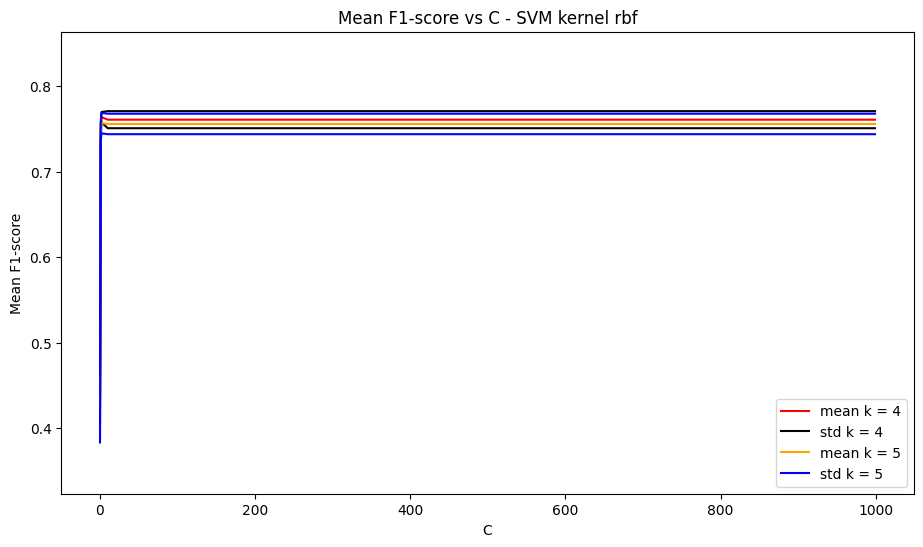

In [20]:
C_values = [0.1, 1, 2, 10, 70, 500, 999]

lista_resultados = []
for c in C_values:
    print(f"Modelo: kernel RBF y C = {c}")

    SVM = SVC(C = c, kernel = 'rbf', random_state = 8) # Creando modelo
    resultados = entrenamiento(SVM, 'T') # Entrenando
    
    lista_resultados.append(resultados)
    
graficar(lista_resultados, 0, 0, 11, 6, C_values, str(f'Mean F1-score vs C - SVM kernel rbf'), str('Mean F1-score'), str('C'))
 


### Como se observa, luego de C = 10 el score se estabiliza, así que se analizará 1 <= C < 10:

Modelo: kernel RBF y C = 1
K = 4: 0.747 +- 0.007
K = 5: 0.747 +- 0.011
Modelo: kernel RBF y C = 2
K = 4: 0.764 +- 0.006
K = 5: 0.757 +- 0.012
Modelo: kernel RBF y C = 3
K = 4: 0.764 +- 0.010
K = 5: 0.757 +- 0.012
Modelo: kernel RBF y C = 4
K = 4: 0.762 +- 0.009
K = 5: 0.755 +- 0.011
Modelo: kernel RBF y C = 5
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012
Modelo: kernel RBF y C = 6
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012
Modelo: kernel RBF y C = 7
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012
Modelo: kernel RBF y C = 8
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012
Modelo: kernel RBF y C = 9
K = 4: 0.761 +- 0.010
K = 5: 0.756 +- 0.012


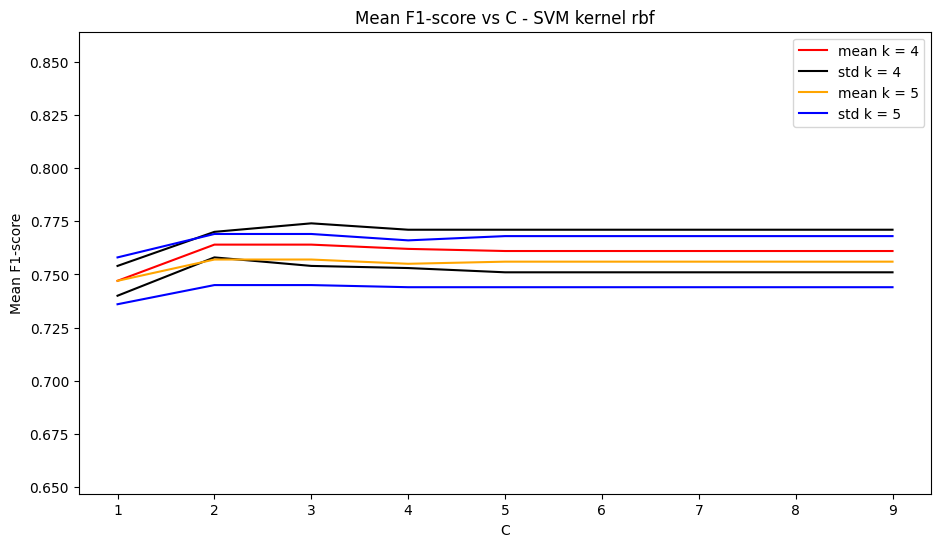

In [21]:
C_values = range(1,10,1)

lista_resultados = []
for c in C_values:
    print(f"Modelo: kernel RBF y C = {c}")

    SVM = SVC(C = c, kernel = 'rbf', random_state = 8) # Creando modelo
    resultados = entrenamiento(SVM, 'T') # Entrenando
    
    lista_resultados.append(resultados)
    
graficar(lista_resultados,  0, 0, 11, 6, C_values, str(f'Mean F1-score vs C - SVM kernel rbf'), str('Mean F1-score'), str('C'))
 


### Finalmente, se escoge C = 3, ya que es el que menos variación de score entre los distintos k. No se considera std en la toma de decisión ya que es similiar entre todos.

## SVC(C = 3, kernel = 'rbf', random_state = 8)
#### Modelo: kernel RBF y C = 3
#### K = 4: 0.793 +- 0.004
#### K = 5: 0.792 +- 0.013

# Naive Bayes
### Se entrenarán modelos de NB con distintos valores de alpha:

#### Se usa count_vectorizer porque dió valores de score más altos. 

Modelo: alpha = 0.1


K = 4: 0.757 +- 0.006
K = 5: 0.748 +- 0.012

Modelo: alpha = 0.5
K = 4: 0.754 +- 0.006
K = 5: 0.760 +- 0.005

Modelo: alpha = 1
K = 4: 0.745 +- 0.009
K = 5: 0.748 +- 0.010

Modelo: alpha = 2
K = 4: 0.721 +- 0.013
K = 5: 0.719 +- 0.024

Modelo: alpha = 5
K = 4: 0.641 +- 0.023
K = 5: 0.645 +- 0.059

Modelo: alpha = 10
K = 4: 0.579 +- 0.034
K = 5: 0.589 +- 0.069

Modelo: alpha = 60
K = 4: 0.458 +- 0.030
K = 5: 0.472 +- 0.064

Modelo: alpha = 100
K = 4: 0.442 +- 0.025
K = 5: 0.450 +- 0.058



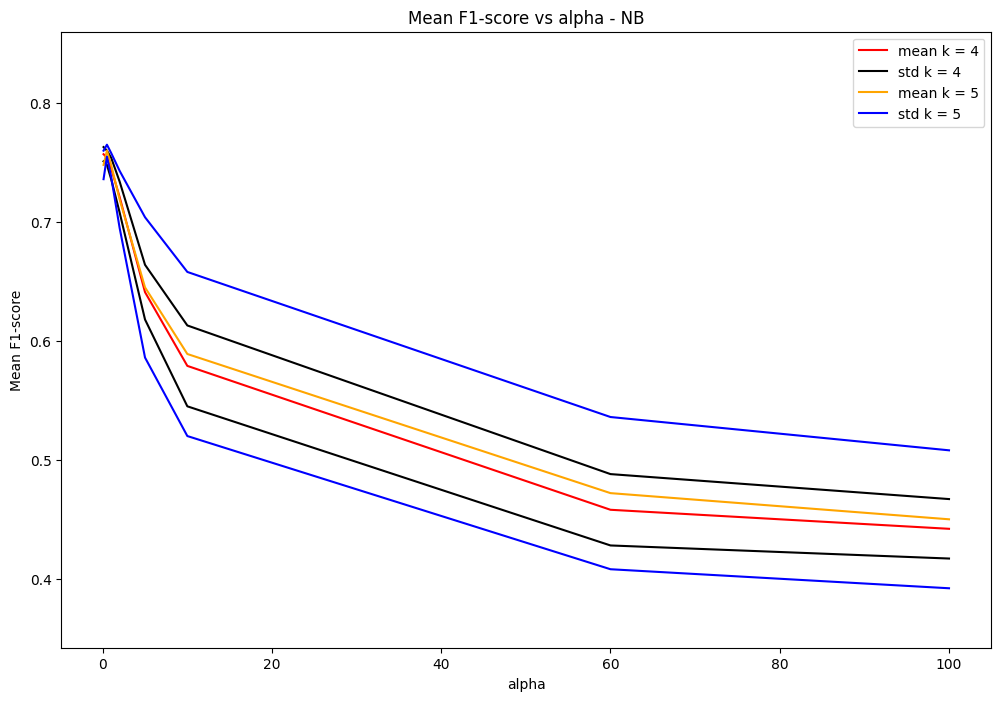

In [22]:
alpha_values = [0.1, 0.5, 1, 2, 5, 10, 60, 100]
lista_resultados = []

for alpha in alpha_values:
    print(f"Modelo: alpha = {alpha}")
        
    NB = MultinomialNB(alpha = alpha) # Creando modelo
    resultados = entrenamiento(NB, 'C') # Entrenando
    print('')
    
    lista_resultados.append(resultados)
    
graficar(lista_resultados, 0, 0, 12, 8, alpha_values, str(f'Mean F1-score vs alpha - NB'), str('Mean F1-score'), str('alpha'))
 
    


In [23]:
# Concluir
# Hmm los que tienen score alto (bajo sesgo) igual tiene alta varianza
# alpha = 0.5 me convence. Porque los score son altos, parecidos entre los k y 
# la std es como media, ni tan alta ni tan baja

# Ensamblados

## Bagging Random Forest
### Para escoger el mejor modelo, primero se va a elegir si usar gini o entropy como criterio. Para esto no se va a definir un max_depth de crecimiento, es decir, se tendrá un modelo complejo. La idea es que a mayor NE disminuya la varianza.

#### Se usa count_vectorizer porque dió valores de score más altos. 

Modelo: GINI, NE = 20
K = 4: 0.733 +- 0.013
K = 5: 0.727 +- 0.021

Modelo: GINI, NE = 50
K = 4: 0.738 +- 0.014
K = 5: 0.743 +- 0.012

Modelo: GINI, NE = 100
K = 4: 0.737 +- 0.024
K = 5: 0.755 +- 0.014

Modelo: GINI, NE = 250
K = 4: 0.747 +- 0.027
K = 5: 0.759 +- 0.017

Modelo: GINI, NE = 500
K = 4: 0.754 +- 0.025
K = 5: 0.756 +- 0.018



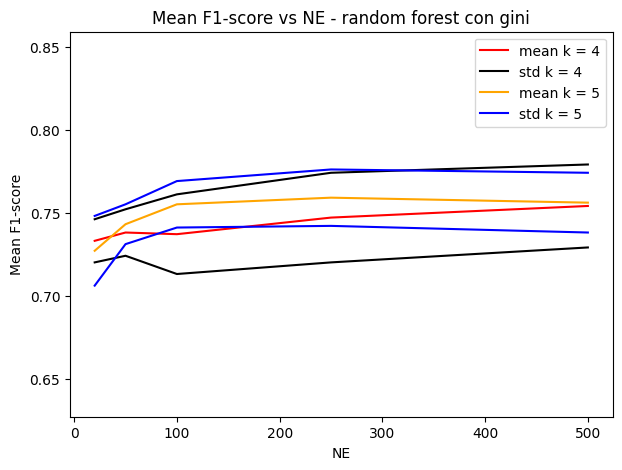

Modelo: ENTROPY, NE = 20
K = 4: 0.748 +- 0.011
K = 5: 0.737 +- 0.004

Modelo: ENTROPY, NE = 50
K = 4: 0.752 +- 0.007
K = 5: 0.765 +- 0.004

Modelo: ENTROPY, NE = 100
K = 4: 0.760 +- 0.016
K = 5: 0.759 +- 0.007

Modelo: ENTROPY, NE = 250
K = 4: 0.762 +- 0.018
K = 5: 0.763 +- 0.009

Modelo: ENTROPY, NE = 500
K = 4: 0.764 +- 0.016
K = 5: 0.767 +- 0.009



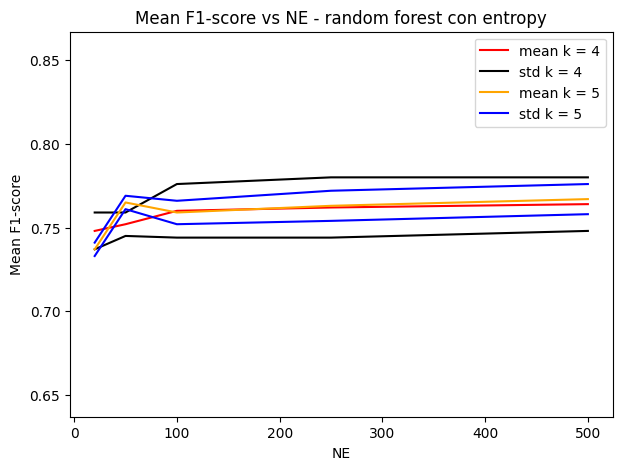

In [24]:
NE_values = [20, 50, 100, 250, 500]

for criterio in ['gini', 'entropy']:
    lista_resultados = []
    
    for NE in NE_values:
        print(f'Modelo: {criterio.upper()}, NE = {NE}')
        
        RFC = RandomForestClassifier(n_estimators = NE, criterion = criterio, n_jobs=-1, random_state=8) 
        resultados = entrenamiento(RFC, 'C') 
        
        print('')
        
        lista_resultados.append(resultados)

    graficar(lista_resultados, 0, 0, 7, 5, NE_values, str(f'Mean F1-score vs NE - random forest con {criterio}'), str('Mean F1-score'), str('NE'))
 

### Es posible notar que gini tiene valores menores de std y obtiene modelos más generalizados. Además, con entropy la std aumenta a medida que aumenta NE. Ahora se define la cantidad de árboles a usar (NE):

Modelo: NE = 5
K = 4: 0.713 +- 0.010
K = 5: 0.684 +- 0.020

Modelo: NE = 10
K = 4: 0.734 +- 0.022
K = 5: 0.711 +- 0.021

Modelo: NE = 20
K = 4: 0.748 +- 0.011
K = 5: 0.737 +- 0.004

Modelo: NE = 50
K = 4: 0.752 +- 0.007
K = 5: 0.765 +- 0.004

Modelo: NE = 70
K = 4: 0.755 +- 0.010
K = 5: 0.761 +- 0.004

Modelo: NE = 100
K = 4: 0.760 +- 0.016
K = 5: 0.759 +- 0.007

Modelo: NE = 200
K = 4: 0.763 +- 0.014
K = 5: 0.763 +- 0.008

Modelo: NE = 300
K = 4: 0.765 +- 0.016
K = 5: 0.763 +- 0.011

Modelo: NE = 400
K = 4: 0.763 +- 0.015
K = 5: 0.764 +- 0.008

Modelo: NE = 500
K = 4: 0.764 +- 0.016
K = 5: 0.767 +- 0.009

Modelo: NE = 600
K = 4: 0.764 +- 0.017
K = 5: 0.765 +- 0.010



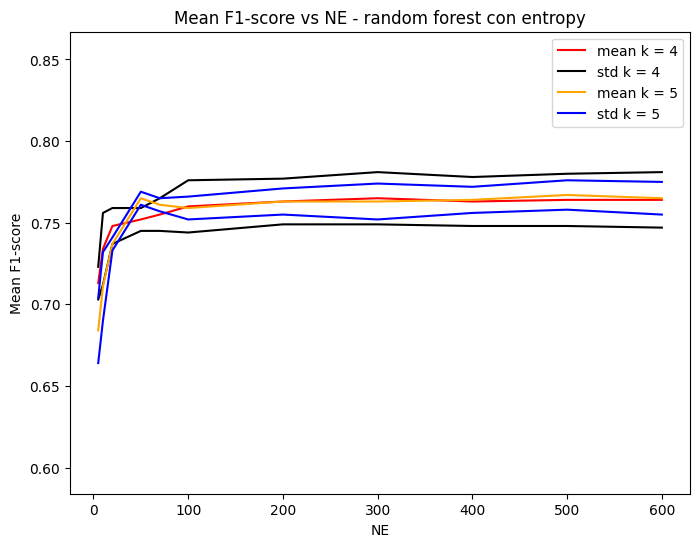

In [43]:
NE_values = [5, 10, 20, 50, 70, 100, 200, 300, 400, 500, 600]
lista_resultados = []

for NE in [5, 10, 20, 50, 70, 100, 200, 300, 400, 500, 600]:
    print(f'Modelo: NE = {NE}')
    
    RFC = RandomForestClassifier(n_estimators = NE, max_depth = None, criterion = 'entropy', n_jobs=-1, random_state = 8)
    resultados = entrenamiento(RFC, 'C')

    print('')
     
    lista_resultados.append(resultados)

graficar(lista_resultados,  0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - random forest con entropy'), str('Mean F1-score'), str('NE'))

Modelo: MD = 2
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: MD = 7
K = 4: 0.430 +- 0.025
K = 5: 0.427 +- 0.044

Modelo: MD = 12
K = 4: 0.493 +- 0.047
K = 5: 0.484 +- 0.069

Modelo: MD = 17
K = 4: 0.584 +- 0.035
K = 5: 0.573 +- 0.073

Modelo: MD = 22
K = 4: 0.653 +- 0.019
K = 5: 0.640 +- 0.057

Modelo: MD = 27
K = 4: 0.681 +- 0.024
K = 5: 0.677 +- 0.045

Modelo: MD = 32
K = 4: 0.705 +- 0.023
K = 5: 0.705 +- 0.039

Modelo: MD = 37
K = 4: 0.724 +- 0.024
K = 5: 0.726 +- 0.029

Modelo: MD = 42
K = 4: 0.737 +- 0.023
K = 5: 0.737 +- 0.023

Modelo: MD = 47
K = 4: 0.750 +- 0.020
K = 5: 0.735 +- 0.017

Modelo: MD = 52
K = 4: 0.747 +- 0.023
K = 5: 0.742 +- 0.017

Modelo: MD = 57
K = 4: 0.753 +- 0.018
K = 5: 0.754 +- 0.018

Modelo: MD = 62
K = 4: 0.750 +- 0.015
K = 5: 0.755 +- 0.019

Modelo: MD = 67
K = 4: 0.761 +- 0.017
K = 5: 0.750 +- 0.016

Modelo: MD = 72
K = 4: 0.761 +- 0.018
K = 5: 0.760 +- 0.015

Modelo: MD = 77
K = 4: 0.759 +- 0.016
K = 5: 0.757 +- 0.018

Modelo: MD = 82
K = 4: 0.7

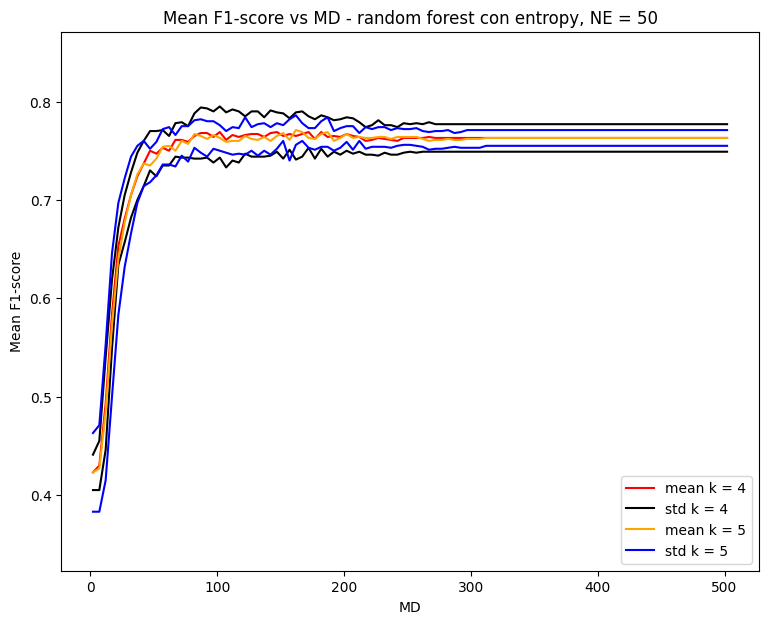

In [44]:
# AJUSTAR MAX DEPTH

MD_values = range(2, 503, 5)
lista_resultados = []

for MD in MD_values:
    print(f'Modelo: MD = {MD}')
                                            # Usando el 250
    RFC = RandomForestClassifier(n_estimators = 200, max_depth = MD, criterion = 'entropy', n_jobs=-1, random_state = 8)
    resultados = entrenamiento(RFC, 'C')

    print('')
     
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 9, 7, MD_values, str(f'Mean F1-score vs MD - random forest con entropy, NE = 50'), str('Mean F1-score'), str('MD'))
 

## Bagging de NV

Modelo: NE = 5
K = 4: 0.753 +- 0.014
K = 5: 0.753 +- 0.006

Modelo: NE = 10
K = 4: 0.761 +- 0.006
K = 5: 0.759 +- 0.003

Modelo: NE = 20
K = 4: 0.759 +- 0.008
K = 5: 0.761 +- 0.004

Modelo: NE = 50
K = 4: 0.760 +- 0.006
K = 5: 0.761 +- 0.007

Modelo: NE = 70
K = 4: 0.758 +- 0.003
K = 5: 0.761 +- 0.007

Modelo: NE = 100
K = 4: 0.757 +- 0.003
K = 5: 0.760 +- 0.009

Modelo: NE = 250
K = 4: 0.757 +- 0.003
K = 5: 0.760 +- 0.006

Modelo: NE = 500
K = 4: 0.760 +- 0.003
K = 5: 0.761 +- 0.004



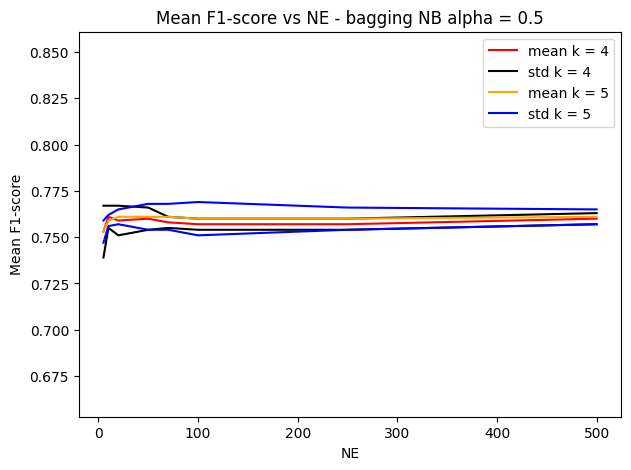

In [29]:
# AJUSTAR ALPHA Y NE 0.5

NE_values = [5, 10, 20, 50, 70, 100, 250, 500]
lista_resultados = []

for NE in NE_values:
    
    print(f'Modelo: NE = {NE}')
    
    BC = BaggingClassifier(estimator = MultinomialNB(alpha = 0.5), n_estimators = NE, random_state = 8)
    resultados = entrenamiento(BC, 'C')
    
    print('')
     
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 7, 5, NE_values, str(f'Mean F1-score vs NE - bagging NB alpha = 0.5'), str('Mean F1-score'), str('NE'))
 

In [30]:
# se supone que el bagging disminuye la varianza pero no veo mucho cambio, 
# ni entre distinto NE o con el NB solito de antes. Así que tb lo descartaría

## Bagging de SVM

Modelo: NE = 5
K = 4: 0.741 +- 0.021
K = 5: 0.740 +- 0.023

Modelo: NE = 10
K = 4: 0.756 +- 0.016
K = 5: 0.748 +- 0.014

Modelo: NE = 20
K = 4: 0.756 +- 0.011
K = 5: 0.745 +- 0.012

Modelo: NE = 50
K = 4: 0.754 +- 0.011
K = 5: 0.747 +- 0.012

Modelo: NE = 70
K = 4: 0.753 +- 0.010
K = 5: 0.750 +- 0.013

Modelo: NE = 100
K = 4: 0.752 +- 0.012
K = 5: 0.749 +- 0.015

Modelo: NE = 250
K = 4: 0.755 +- 0.010
K = 5: 0.750 +- 0.013

Modelo: NE = 500
K = 4: 0.754 +- 0.010
K = 5: 0.751 +- 0.013



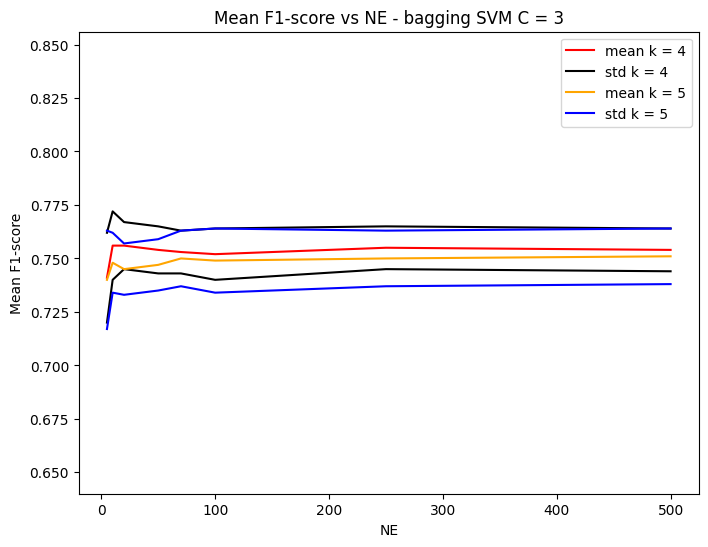

In [31]:
# AJUSTAR NE
NE_values = [5, 10, 20, 50, 70, 100, 250, 500]
lista_resultados = []

for NE in NE_values:
    print(f'Modelo: NE = {NE}')
    
    BC = BaggingClassifier(estimator = SVC(C = 3, kernel = 'rbf', random_state = 8), n_estimators = NE, n_jobs=-1, random_state = 8)
    resultados = entrenamiento(BC, 'T')

    
    print('')
    
    lista_resultados.append(resultados)

graficar(lista_resultados,  0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - bagging SVM C = 3'), str('Mean F1-score'), str('NE'))
 

In [33]:
'''
Estos son los resultados con SVM solito.
Modelo: kernel RBF y C = 3
K = 4: 0.793 +- 0.004
K = 5: 0.792 +- 0.013
'''   
# Se espera que la std baje y puede que ocurrir que el score baje tb (tipo baja varianza a costa 
# del sesgo que aumenta

# Yo diría NE = 10 aunque el NE = 100 tampoco se ve tan mal¿? No igual usa un montón de modelos 
# para empeorar la std y mejorar casi que nada el score. El NE = 20 se ve lindo igual. 
# Los 2 son 0.78 al final

'\nEstos son los resultados con SVM solito.\nModelo: kernel RBF y C = 3\nK = 4: 0.793 +- 0.004\nK = 5: 0.792 +- 0.013\n'

## Adaboost

In [34]:
# Este usa modelos sencillos y mejora el sesgo

Usando Tfidf_Vectorizer
Modelo: NE = 5
K = 4: 0.719 +- 0.018
K = 5: 0.714 +- 0.011

Modelo: NE = 10
K = 4: 0.711 +- 0.021
K = 5: 0.705 +- 0.021

Modelo: NE = 20
K = 4: 0.679 +- 0.007
K = 5: 0.695 +- 0.014

Modelo: NE = 50
K = 4: 0.671 +- 0.008
K = 5: 0.685 +- 0.016

Modelo: NE = 70
K = 4: 0.677 +- 0.010
K = 5: 0.684 +- 0.021

Modelo: NE = 100
K = 4: 0.674 +- 0.011
K = 5: 0.682 +- 0.017

Modelo: NE = 250
K = 4: 0.712 +- 0.019
K = 5: 0.700 +- 0.013

Modelo: NE = 500
K = 4: 0.711 +- 0.021
K = 5: 0.699 +- 0.013



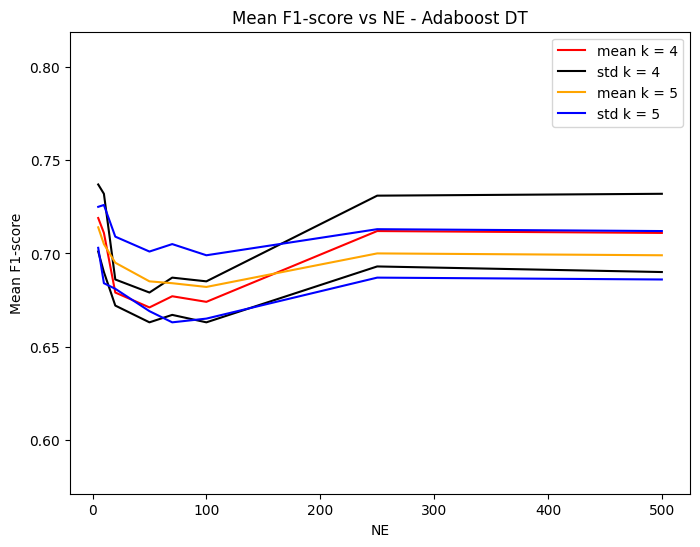

Usando Count_Vectorizer
Modelo: NE = 5
K = 4: 0.729 +- 0.024
K = 5: 0.731 +- 0.019

Modelo: NE = 10
K = 4: 0.721 +- 0.022
K = 5: 0.741 +- 0.020

Modelo: NE = 20
K = 4: 0.716 +- 0.005
K = 5: 0.718 +- 0.017

Modelo: NE = 50
K = 4: 0.694 +- 0.008
K = 5: 0.707 +- 0.020

Modelo: NE = 70
K = 4: 0.702 +- 0.008
K = 5: 0.704 +- 0.021

Modelo: NE = 100
K = 4: 0.687 +- 0.017
K = 5: 0.712 +- 0.012

Modelo: NE = 250
K = 4: 0.715 +- 0.014
K = 5: 0.720 +- 0.020

Modelo: NE = 500
K = 4: 0.715 +- 0.015
K = 5: 0.720 +- 0.021



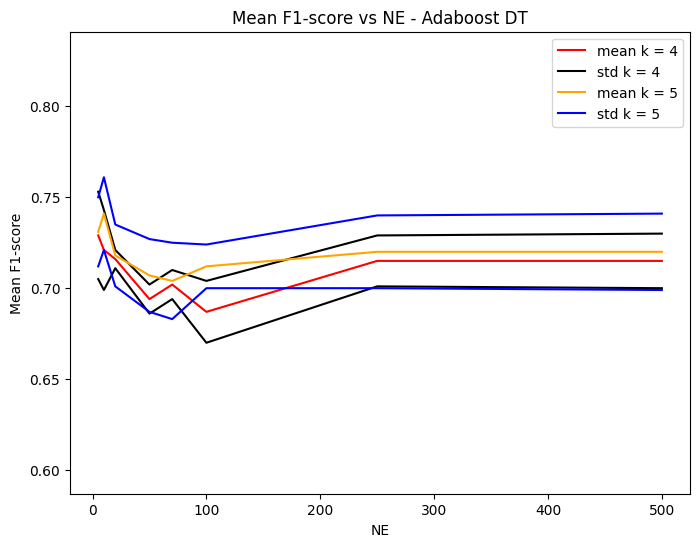

In [36]:
# AJUSTAR MD, NE 
NE_values = [5, 10, 20, 50, 70, 100, 250, 500]
lista_resultados = []

print('Usando Tfidf_Vectorizer')
for NE in NE_values:
    print(f'Modelo: NE = {NE}')
                                                         # max_depth pequeño para que sea sencillo
    ABC = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 5), n_estimators = NE, random_state=8)
    resultados = entrenamiento(ABC, 'T')
    print('')
    
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - Adaboost DT'), str('Mean F1-score'), str('NE'))

# Clear the lista_resultados list before the second loop
lista_resultados.clear()

print('Usando Count_Vectorizer')
for NE in NE_values:
    print(f'Modelo: NE = {NE}')
                                                         # max_depth pequeño para que sea sencillo
    ABC = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 5), n_estimators = NE, random_state=8)
    resultados = entrenamiento(ABC, 'C')
    print('')
    
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - Adaboost DT'), str('Mean F1-score'), str('NE'))
 

Usando Tfidf_Vectorizer
Modelo: NE = 5
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 10
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 20
K = 4: 0.432 +- 0.021
K = 5: 0.434 +- 0.049

Modelo: NE = 50
K = 4: 0.549 +- 0.036
K = 5: 0.542 +- 0.072

Modelo: NE = 70
K = 4: 0.610 +- 0.039
K = 5: 0.608 +- 0.072

Modelo: NE = 100
K = 4: 0.668 +- 0.022
K = 5: 0.661 +- 0.053

Modelo: NE = 250
K = 4: 0.728 +- 0.014
K = 5: 0.727 +- 0.026

Modelo: NE = 500
K = 4: 0.750 +- 0.010
K = 5: 0.747 +- 0.015



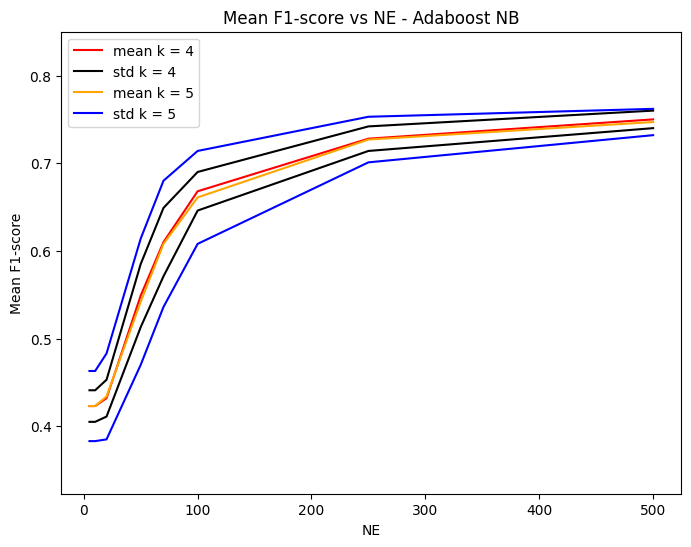

Usando Count_Vectorizer
Modelo: NE = 5
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 10
K = 4: 0.252 +- 0.016
K = 5: 0.252 +- 0.034

Modelo: NE = 20
K = 4: 0.265 +- 0.011
K = 5: 0.261 +- 0.032

Modelo: NE = 50
K = 4: 0.442 +- 0.059
K = 5: 0.419 +- 0.066

Modelo: NE = 70
K = 4: 0.543 +- 0.049
K = 5: 0.524 +- 0.063

Modelo: NE = 100
K = 4: 0.623 +- 0.040
K = 5: 0.616 +- 0.052

Modelo: NE = 250
K = 4: 0.720 +- 0.017
K = 5: 0.715 +- 0.021

Modelo: NE = 500
K = 4: 0.733 +- 0.014
K = 5: 0.735 +- 0.015



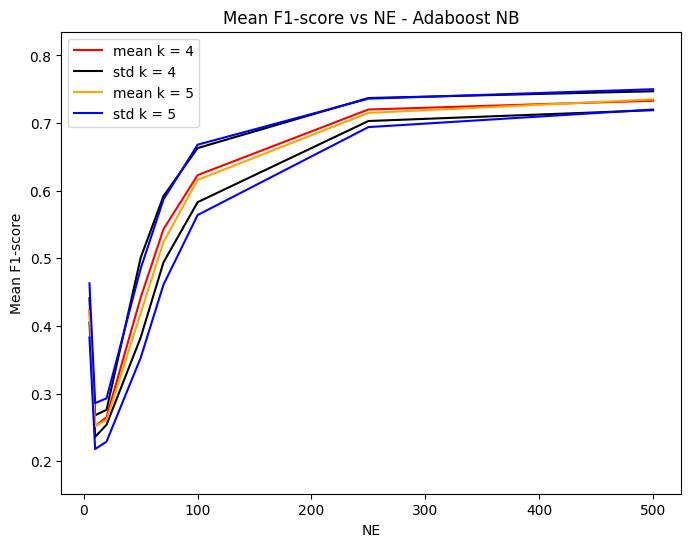

In [38]:

NE_values = [5, 10, 20, 50, 70, 100, 250, 500]
lista_resultados = []

print('Usando Tfidf_Vectorizer')
for NE in NE_values:
    print(f'Modelo: NE = {NE}')
                                           # Usando el 0.5. Cambiar de ser necesario
    ABC = AdaBoostClassifier(estimator = MultinomialNB(alpha = 0.5), n_estimators = NE, random_state=8)
    resultados = entrenamiento(ABC, 'T')
    print('')
    
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - Adaboost NB'), str('Mean F1-score'), str('NE'))

lista_resultados.clear()

print('Usando Count_Vectorizer')
for NE in NE_values:
    print(f'Modelo: NE = {NE}')
                                                        # Usando el 0.5. Cambiar de ser necesario
    ABC = AdaBoostClassifier(estimator = MultinomialNB(alpha = 0.5), n_estimators = NE, random_state=8)
    resultados = entrenamiento(ABC, 'C')
    print('')
    
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - Adaboost NB'), str('Mean F1-score'), str('NE'))
 

Usando Tfidf_Vectorizer
Modelo: NE = 5
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 10
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 20
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 50
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 70
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 100
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 250
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 500
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040



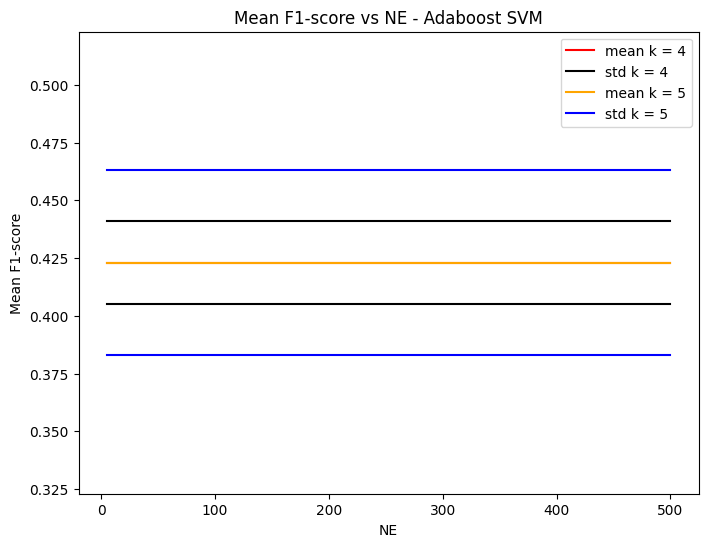

Usando Count_Vectorizer
Modelo: NE = 5
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 10
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 20
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 50
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 70
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 100
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 250
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040

Modelo: NE = 500
K = 4: 0.423 +- 0.018
K = 5: 0.423 +- 0.040



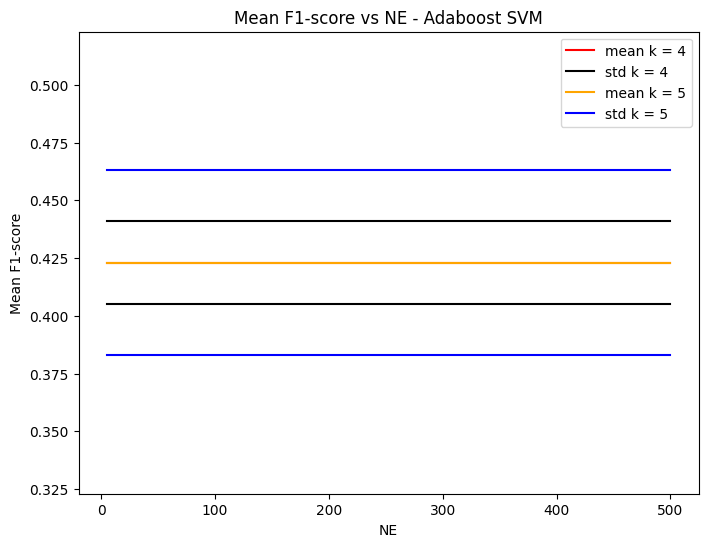

In [39]:
NE_values = [5, 10, 20, 50, 70, 100, 250, 500]
lista_resultados = []

print('Usando Tfidf_Vectorizer')
for NE in NE_values:
    print(f'Modelo: NE = {NE}')
    ABC = AdaBoostClassifier(estimator=SVC(C=3, kernel='rbf', random_state=8), n_estimators=NE, algorithm='SAMME', random_state=8)
    resultados = entrenamiento(ABC, 'T')
    print('')
    
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - Adaboost SVM'), str('Mean F1-score'), str('NE'))

lista_resultados.clear()

print('Usando Count_Vectorizer')
for NE in NE_values:
    print(f'Modelo: NE = {NE}')
    ABC = AdaBoostClassifier(estimator=SVC(C=3, kernel='rbf', random_state=8), n_estimators=NE, algorithm='SAMME', random_state=8)
    
    resultados = entrenamiento(ABC, 'C')
    print('')
    
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - Adaboost SVM'), str('Mean F1-score'), str('NE'))
 
    
    

## Gradient Boosting

Usando Tfidf_Vectorizer
Modelo: NE = 5
K = 4: 0.490 +- 0.061
K = 5: 0.475 +- 0.081

Modelo: NE = 10
K = 4: 0.595 +- 0.012
K = 5: 0.570 +- 0.077

Modelo: NE = 20
K = 4: 0.702 +- 0.023
K = 5: 0.692 +- 0.022

Modelo: NE = 50
K = 4: 0.733 +- 0.022
K = 5: 0.743 +- 0.026

Modelo: NE = 70
K = 4: 0.744 +- 0.024
K = 5: 0.743 +- 0.023

Modelo: NE = 100
K = 4: 0.747 +- 0.021
K = 5: 0.747 +- 0.016

Modelo: NE = 250
K = 4: 0.743 +- 0.008
K = 5: 0.745 +- 0.003

Modelo: NE = 500
K = 4: 0.737 +- 0.008
K = 5: 0.745 +- 0.009



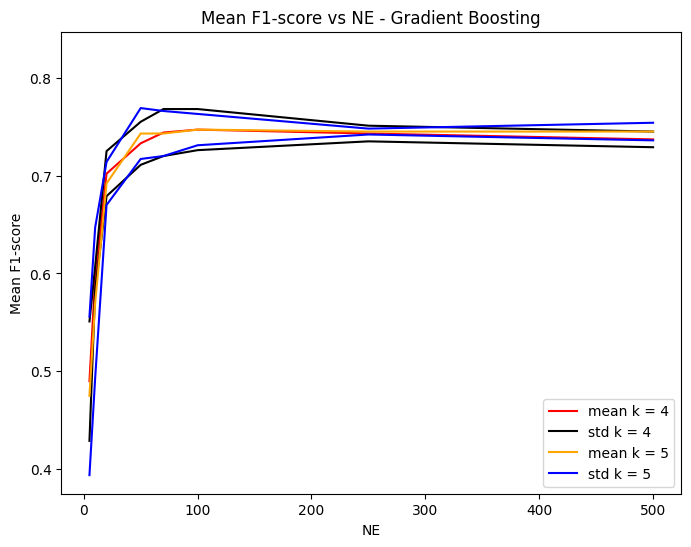

Usando Count_Vectorizer
Modelo: NE = 5
K = 4: 0.453 +- 0.053
K = 5: 0.447 +- 0.076

Modelo: NE = 10
K = 4: 0.615 +- 0.069
K = 5: 0.610 +- 0.065

Modelo: NE = 20
K = 4: 0.683 +- 0.040
K = 5: 0.692 +- 0.035

Modelo: NE = 50
K = 4: 0.747 +- 0.018
K = 5: 0.735 +- 0.022

Modelo: NE = 70
K = 4: 0.752 +- 0.023
K = 5: 0.747 +- 0.016

Modelo: NE = 100
K = 4: 0.758 +- 0.022
K = 5: 0.754 +- 0.023

Modelo: NE = 250
K = 4: 0.757 +- 0.017
K = 5: 0.761 +- 0.013

Modelo: NE = 500
K = 4: 0.763 +- 0.010
K = 5: 0.757 +- 0.010



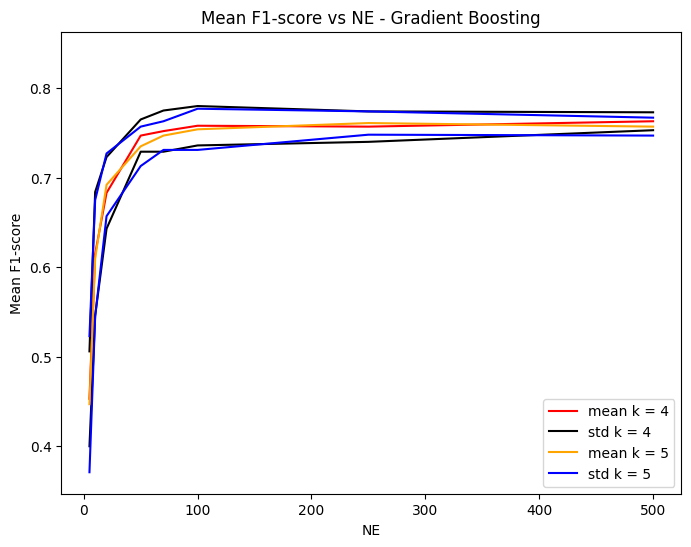

In [40]:
NE_values = [5, 10, 20, 50, 70, 100, 250, 500]
lista_resultados = []

print('Usando Tfidf_Vectorizer')
for NE in NE_values:
    print(f'Modelo: NE = {NE}')
    GB = GradientBoostingClassifier(n_estimators = NE, random_state = 8)
    
    resultados = entrenamiento(GB, 'T')
    print('')
    
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - Gradient Boosting'), str('Mean F1-score'), str('NE'))

lista_resultados.clear()

print('Usando Count_Vectorizer')
for NE in NE_values:
    print(f'Modelo: NE = {NE}')
    GB = GradientBoostingClassifier(n_estimators = NE, random_state = 8)
    
    resultados = entrenamiento(GB, 'C')
    print('')
    
    lista_resultados.append(resultados)

graficar(lista_resultados, 0, 0, 8, 6, NE_values, str(f'Mean F1-score vs NE - Gradient Boosting'), str('Mean F1-score'), str('NE'))
